- # ****Logistic Regression with L1 Regularization (Lasso)****
   -  ### ****The model was trained using Logistic Regression with L1 Regularization (Lasso). The primary objective of using L1 was to perform Automated Feature Selection by penalizing the absolute size of the coefficients. This helps in identifying which variables among the 76 features are truly contributing to the prediction of "Reorder" events****

- ## ****Sparsity Analysis****
   -  ### ****Features Excluded: The model successfully zeroed out 1 feature out of 76****
   -  ### ****Interpretation: This indicates that the initial feature engineering was highly relevant, as the Lasso penalty found 75 out of 76 features significant enough to maintain a non-zero coefficient. The exclusion of one feature helps in slightly simplifying the model without sacrificing predictive power****

- ## ****Comparative Metrics & Stability****
   -  ### ****ROC-AUC (0.8125): The performance remains identical to the L2 model. This suggests that the relationship between the features and the target is robust, and switching to a sparser model (L1) did not degrade the model's ability to rank probabilities****
   -  ### ****Consistency: The Recall (0.7364) and Precision (0.1550) stayed perfectly consistent with the L2 results. This confirms that for this specific dataset, the choice between L1 and L2 doesn't significantly alter the classification boundaries, but L1 provides a more "interpretable" model by highlighting the most essential features****
   -  ### ****MCC (0.2502): The stability of the Matthews Correlation Coefficient further validates that the model is performing consistently across different regularization techniques****

جاري تدريب نموذج Logistic Regression (L1 - Lasso)...
--- نتائج نموذج L1 (Lasso) ---

--- LogReg L1 Performance Metrics ---
Accuracy              : 0.7372
Precision             : 0.1550
Recall                : 0.7364
F1-score              : 0.2561
MCC                   : 0.2502
ROC-AUC               : 0.8125
Avg Precision (AP)    : 0.2556


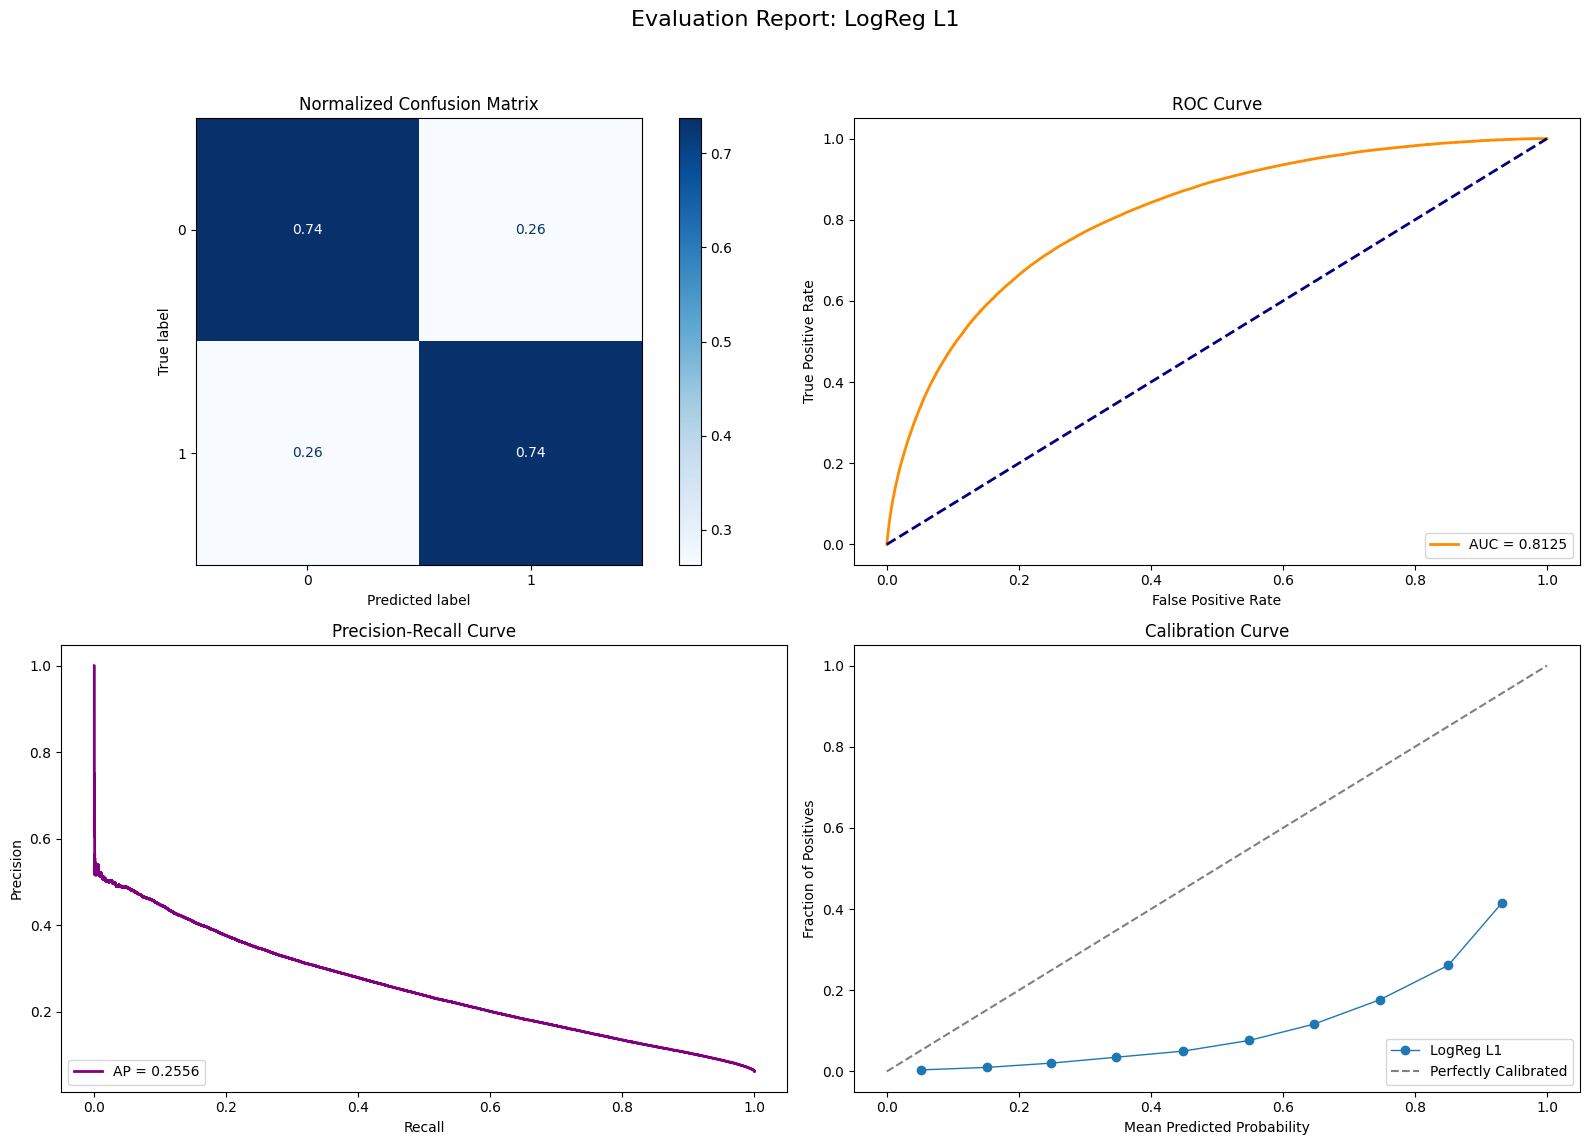

1 76


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_l1 = LogisticRegression(
    penalty='l1',
    C=1.0,
    class_weight='balanced',
    solver='saga',
    n_jobs=-1,
    random_state=42,
    max_iter=100
)

print("جاري تدريب نموذج Logistic Regression (L1 - Lasso)...")
log_reg_l1.fit(X_train_scaled, y_train)

print("--- نتائج نموذج L1 (Lasso) ---")
l1_metrics = evaluate_model(log_reg_l1, X_val_scaled, y_val, model_name="LogReg L1")

zero_weights = np.sum(log_reg_l1.coef_ == 0)
print(f"{zero_weights} {len(features)}")